# Impoting Libraries

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC


# Loading Dataset

In [7]:
df = pd.read_csv("student-por.csv", sep=";")
print(df.head())
print(df.info())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (to

# Cleaning and Preprocessing of Data

In [8]:
df_clean = df.copy()

label_cols = df_clean.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in label_cols:
    df_clean[col] = le.fit_transform(df_clean[col])


In [9]:
print(df_clean.isnull().sum())
df_clean = df_clean.dropna()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [10]:
X_reg = df_clean.drop("G3", axis=1)
y_reg = df_clean["G3"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)


# Regression Models

## Model 1: Linear Regression

In [20]:
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

pred_lr = lr.predict(X_test_reg)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, pred_lr)))
print("R2 Score:", r2_score(y_test_reg, pred_lr))


Linear Regression RMSE: 1.1987884318098003
R2 Score: 0.8526317103852279


## Model 2: Decision Tree Regressor

In [13]:
dt = DecisionTreeRegressor()
dt.fit(X_train_reg, y_train_reg)

pred_dt = dt.predict(X_test_reg)

print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test_reg, pred_dt)))
print("R2 Score:", r2_score(y_test_reg, pred_dt))


Decision Tree RMSE: 1.9980759976306437
R2 Score: 0.5906045969758016


## Model 3: Random Forest Regressor (Best Model)

In [14]:
rf = RandomForestRegressor()
rf.fit(X_train_reg, y_train_reg)

pred_rf = rf.predict(X_test_reg)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test_reg, pred_rf)))
print("R2 Score:", r2_score(y_test_reg, pred_rf))


Random Forest RMSE: 1.2425002708558752
R2 Score: 0.8416886908084755


# Classification Models (PASS / FAIL)

## Creating classification target:

In [15]:
df_clean["pass_fail"] = df_clean["G3"].apply(lambda x: 1 if x >= 10 else 0)

X_clf = df_clean.drop(["G3", "pass_fail"], axis=1)
y_clf = df_clean["pass_fail"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


In [16]:
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)


## Model 1: Logistic Regression

In [17]:
log_clf = LogisticRegression(max_iter=200)
log_clf.fit(X_train_clf, y_train_clf)

pred_log = log_clf.predict(X_test_clf)

print("Logistic Regression Accuracy:", accuracy_score(y_test_clf, pred_log))
print(classification_report(y_test_clf, pred_log))


Logistic Regression Accuracy: 0.9076923076923077
              precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.96      0.94      0.95       115

    accuracy                           0.91       130
   macro avg       0.77      0.80      0.79       130
weighted avg       0.91      0.91      0.91       130



## Model 2: Decision Tree Classifier

In [18]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_clf, y_train_clf)

pred_dt = dt_clf.predict(X_test_clf)

print("Decision Tree Accuracy:", accuracy_score(y_test_clf, pred_dt))
print(classification_report(y_test_clf, pred_dt))


Decision Tree Accuracy: 0.9076923076923077
              precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.96      0.94      0.95       115

    accuracy                           0.91       130
   macro avg       0.77      0.80      0.79       130
weighted avg       0.91      0.91      0.91       130



## Model 3: Random Forest Classifier (Best)

In [19]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_clf, y_train_clf)

pred_rf = rf_clf.predict(X_test_clf)

print("Random Forest Accuracy:", accuracy_score(y_test_clf, pred_rf))
print(classification_report(y_test_clf, pred_rf))


Random Forest Accuracy: 0.9307692307692308
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.96      0.97      0.96       115

    accuracy                           0.93       130
   macro avg       0.84      0.82      0.83       130
weighted avg       0.93      0.93      0.93       130



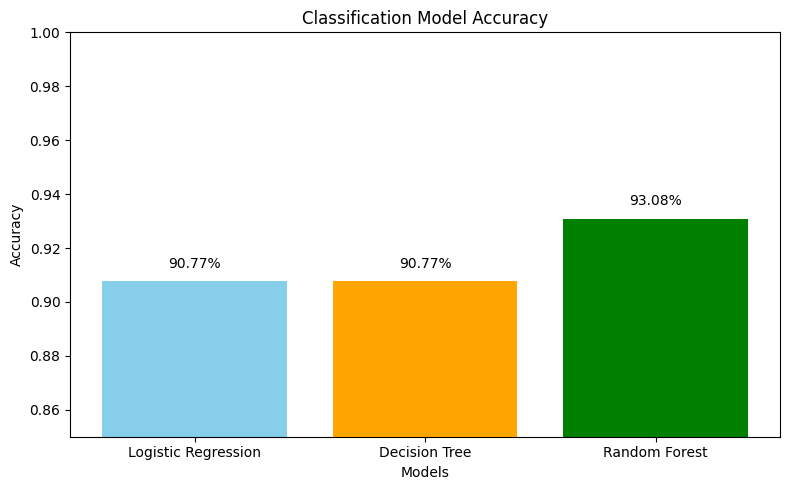

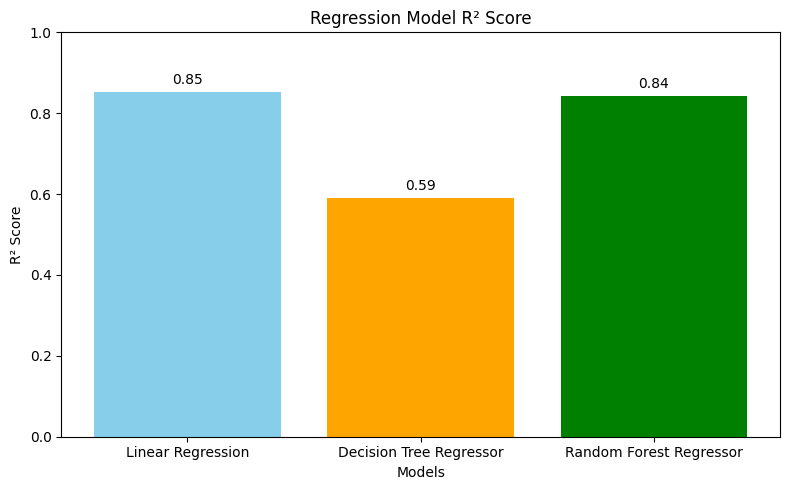

In [22]:
import matplotlib.pyplot as plt

# Models and their accuracy scores for classification
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.9077, 0.9077, 0.9308]

# Plot Classification Accuracy
plt.figure(figsize=(8,5))
plt.bar(models, accuracy, color=['skyblue','orange','green'])
plt.ylim(0.85, 1)
plt.title('Classification Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Models')
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.005, f"{v*100:.2f}%", ha='center')
plt.tight_layout()
plt.show()

# Regression models and R^2 scores
reg_models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
r2_scores = [0.8526, 0.5906, 0.8417]

# Plot Regression R^2 Scores
plt.figure(figsize=(8,5))
plt.bar(reg_models, r2_scores, color=['skyblue','orange','green'])
plt.ylim(0, 1)
plt.title('Regression Model R² Score')
plt.ylabel('R² Score')
plt.xlabel('Models')
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()
